In [1]:
import datasets
from datasets import load_dataset

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
import numpy as np

In [2]:
from tqdm import tqdm

In [3]:
from sia.transformers import as_window

In [4]:
ds = load_dataset('csv', data_files='./data/ecg_model/30100.csv')['train']

Generating train split: 8692000 examples [00:05, 1724578.88 examples/s]


In [8]:
import neurokit2 as nk

In [21]:
n = 20 * 1000

In [22]:
window = ds[0:0+n]['signal']

In [13]:
peaks, info = nk.ecg_peaks(window, sampling_rate=1000)

In [40]:
# ECG_Rate_Mean, ECG_Rate_STD
np.mean(nk.signal_rate(peaks, sampling_rate=1000)), np.std(nk.signal_rate(peaks, sampling_rate=1000))

(59.725440439392344, 3.738670851093251)

The “heart rate” can be described as a true rate in beats per minute (HR) or as the RR interval in milliseconds. 
The RR interval is the time elapsed between two successive R waves of the QRS signal on the electrocardiogram
“Heart rate variability” has become the conventionally accepted term to describe variations of both instantaneous heart rate and RR intervals.

The RR interval and HR are hyperbolically related (HR x RR interval = 60000; see figure 1).

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,1008.473684,65.574697,NaN,NaN,NaN,NaN,NaN,NaN,45.192182,46.059495,...,inf,4.247928,1.254404,NaN,NaN,NaN,1.525146,NaN,1.373195,0.894301


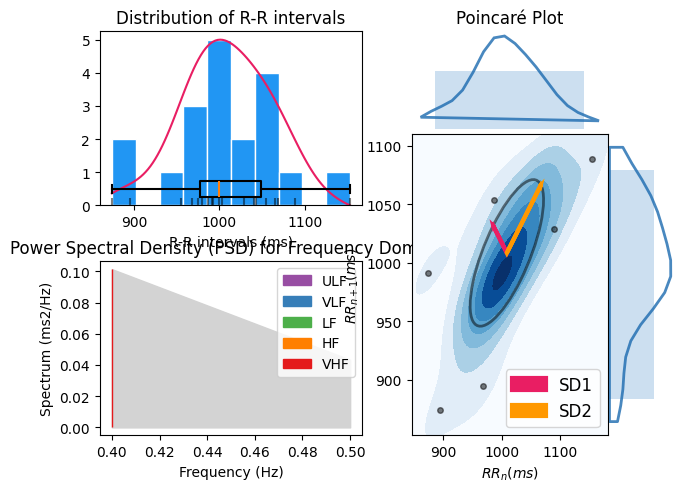

In [14]:
hrv_indices = nk.hrv(peaks, sampling_rate=1000, show=True)
hrv_indices

In [15]:
hrv_indices.columns

Index(['HRV_MeanNN', 'HRV_SDNN', 'HRV_SDANN1', 'HRV_SDNNI1', 'HRV_SDANN2',
       'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5', 'HRV_RMSSD', 'HRV_SDSD',
       'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN',
       'HRV_IQRNN', 'HRV_SDRMSSD', 'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_pNN50',
       'HRV_pNN20', 'HRV_MinNN', 'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'HRV_ULF',
       'HRV_VLF', 'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_TP', 'HRV_LFHF',
       'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2',
       'HRV_S', 'HRV_CSI', 'HRV_CVI', 'HRV_CSI_Modified', 'HRV_PIP',
       'HRV_IALS', 'HRV_PSS', 'HRV_PAS', 'HRV_GI', 'HRV_SI', 'HRV_AI',
       'HRV_PI', 'HRV_C1d', 'HRV_C1a', 'HRV_SD1d', 'HRV_SD1a', 'HRV_C2d',
       'HRV_C2a', 'HRV_SD2d', 'HRV_SD2a', 'HRV_Cd', 'HRV_Ca', 'HRV_SDNNd',
       'HRV_SDNNa', 'HRV_DFA_alpha1', 'HRV_MFDFA_alpha1_Width',
       'HRV_MFDFA_alpha1_Peak', 'HRV_MFDFA_alpha1_Mean',
       'HRV_MFDFA_alpha1_Max', 'HRV_MFDFA_alpha1_Delta',
     

In [20]:
## https://dl-acm-org.vu-nl.idm.oclc.org/doi/epdf/10.1145/3242969.3242985
hrv_indices[[
    'HRV',
]]

KeyError: "['HRV_pNN50HRV_Index'] not in index"